In [50]:
import numpy as np
import pandas as pd
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
plt.style.use('ggplot')

In [51]:
%time df = pd.read_feather('tmp/raw_processed')
df.head(3)

CPU times: total: 78.1 ms
Wall time: 75.7 ms


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed,auctioneerID_na,MachineHoursCurrentMeter_na
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,3,950,296,41,0,0,0,59,1,6,6,0,3,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,17,3,0,0,0,0,0,0,0,0,0,0,0,0,4,2,2006,11,46,16,3,320,False,False,False,False,False,False,1.163635e+09,False,False
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,3,1725,527,55,98,0,4,62,33,6,6,0,3,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,12,3,0,0,0,0,0,0,0,0,0,0,0,0,4,2,2004,3,13,26,4,86,False,False,False,False,False,False,1.080259e+09,False,False
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,1,331,110,0,0,0,0,39,32,3,3,0,6,1,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,1,1,3,0,0,0,0,0,0,0,0,0,0,0,2004,2,9,26,3,57,False,False,False,False,False,False,1.077754e+09,False,False


In [52]:
df.shape

(401125, 67)

In [53]:
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleElapsed
count,4.011250e+05,401125.000000,4.011250e+05,401125.000000,401125.000000,401125.000000,401125.000000,4.011250e+05,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.00000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,4.011250e+05
mean,1.919713e+06,10.103096,1.217903e+06,6889.702980,134.665810,6.327332,1899.156901,1.230726e+03,0.376102,1673.709485,559.165442,36.685036,9.192686,12.233433,1.818219,32.262222,23.508318,3.725524,3.725524,0.809299,3.605195,0.513192,0.422315,0.566736,0.319010,3.372502,0.207060,0.064184,0.235228,0.178436,0.066067,4.253801,0.07722,0.552434,0.094088,0.090179,3.059847,1.511791,0.115889,0.115199,0.321483,0.458792,4.311895,6.535564,0.685153,0.516719,0.319479,0.196178,1.278128,1.132009,0.683189,0.344987,2004.095728,6.407035,26.179864,16.110402,2.600975,179.977581,1.091433e+09
std,9.090215e+05,0.693621,4.409920e+05,6221.777842,8.962237,16.575066,291.797469,1.654290e+04,0.870291,1263.331163,469.310266,38.228243,27.006859,29.041950,2.107830,22.596618,15.732898,1.725772,1.725772,1.436850,2.220353,0.564375,0.873469,0.822794,0.678752,3.764052,0.428657,0.250385,1.025710,0.697879,0.260948,4.809368,0.31616,0.988317,0.384207,0.382552,5.950781,1.450320,0.342865,0.340769,0.926401,0.819459,7.741894,11.923308,1.226899,0.912594,0.659002,0.397231,2.649002,2.307099,1.501999,0.755775,5.754190,3.424575,14.788059,8.427322,1.405763,103.559930,1.816977e+08
min,1.139246e+06,8.465900,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1989.000000,1.000000,1.000000,1.000000,0.000000,2.000000,6.009984e+08
25%,1.418371e+06,9.581904,1.088697e+06,3259.000000,132.000000,1.000000,1985.000000,0.000000e+00,0.000000,631.000000,206.000000,0.000000,0.000000,0.000000,0.000000,11.000000,9.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2000.000000,3.000000,13.000000,9.000000,2.000000,84.000000,9.708768e+08
50%,1.639422e+06,10.085809,1.279490e+06,4604.000000,132.000000,2.000000,1995.000000,0.000000e+00,0.000000,1395.000000,406.000000,29.000000,0.000000,0.000000,0.

In [5]:
df.loc[df['YearMade'] < 1930, 'YearMade'] = 1930
df['age'] = df.saleYear - df.YearMade
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed,auctioneerID_na,MachineHoursCurrentMeter_na,age
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,3,950,296,41,0,0,0,59,1,6,6,0,3,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,17,3,0,0,0,0,0,0,0,0,0,0,0,0,4,2,2006,11,46,16,3,320,False,False,False,False,False,False,1.163635e+09,False,False,2
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,3,1725,527,55,98,0,4,62,33,6,6,0,3,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,12,3,0,0,0,0,0,0,0,0,0,0,0,0,4,2,2004,3,13,26,4,86,False,False,False,False,False,False,1.080259e+09,False,False,8
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,1,331,110,0,0,0,0,39,32,3,3,0,6,1,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,1,1,3,0,0,0,0,0,0,0,0,0,0,0,2004,2,9,26,3,57,False,False,False,False,False,False,1.077754e+09,False,False,3
3,1139251,10.558414,1026470,332,121,3.0,2001,3486.0,1,3674,1375,0,45,0,6,8,44,4,4,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2011,5,20,19,3,139,False,False,False,False,False,False,1.305763e+09,False,False,10
4,1139253,9.305651,1057373,17311,121,3.0,2007,722.0,2,4208,1529,0,0,0,0,40,32,3,3,0,1,1,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,1,1,3,0,0,0,0,0,0,0,0,0,0,0,2009,7,30,23,3,204,False,False,False,False,False,False,1.248307e+09,False,False,2


In [6]:
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleElapsed,age
count,4.011250e+05,401125.000000,4.011250e+05,401125.000000,401125.000000,401125.000000,401125.000000,4.011250e+05,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.00000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,4.011250e+05,401125.000000
mean,1.919713e+06,10.103096,1.217903e+06,6889.702980,134.665810,6.327332,1987.691939,1.230726e+03,0.376102,1673.709485,559.165442,36.685036,9.192686,12.233433,1.818219,32.262222,23.508318,3.725524,3.725524,0.809299,3.605195,0.513192,0.422315,0.566736,0.319010,3.372502,0.207060,0.064184,0.235228,0.178436,0.066067,4.253801,0.07722,0.552434,0.094088,0.090179,3.059847,1.511791,0.115889,0.115199,0.321483,0.458792,4.311895,6.535564,0.685153,0.516719,0.319479,0.196178,1.278128,1.132009,0.683189,0.344987,2004.095728,6.407035,26.179864,16.110402,2.600975,179.977581,1.091433e+09,16.403789
std,9.090215e+05,0.693621,4.409920e+05,6221.777842,8.962237,16.575066,20.844523,1.654290e+04,0.870291,1263.331163,469.310266,38.228243,27.006859,29.041950,2.107830,22.596618,15.732898,1.725772,1.725772,1.436850,2.220353,0.564375,0.873469,0.822794,0.678752,3.764052,0.428657,0.250385,1.025710,0.697879,0.260948,4.809368,0.31616,0.988317,0.384207,0.382552,5.950781,1.450320,0.342865,0.340769,0.926401,0.819459,7.741894,11.923308,1.226899,0.912594,0.659002,0.397231,2.649002,2.307099,1.501999,0.755775,5.754190,3.424575,14.788059,8.427322,1.405763,103.559930,1.816977e+08,20.429022
min,1.139246e+06,8.465900,0.000000e+00,28.000000,121.000000,0.000000,1930.000000,0.000000e+00,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1989.000000,1.000000,1.000000,1.000000,0.000000,2.000000,6.009984e+08,-12.000000
25%,1.418371e+06,9.581904,1.088697e+06,3259.000000,132.000000,1.000000,1985.000000,0.000000e+00,0.000000,631.000000,206.000000,0.000000,0.000000,0.000000,0.000000,11.000000,9.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2000.000000,3.000000,13.000000,9.000000,2.000000,84.000000,9.708768e+08,5.000000
50%,1.639422e+06,10.085809,1.279490e+06,4604.000000,132.000000,2.000000,1995.000000,0.000000e+00,0.000

## Input/Output & Train/Validation

In [7]:
X = df.drop(["SalePrice"], axis=1)
y = df.SalePrice

In [8]:
def split_vals(a, n, seed=None):
    np.random.seed(seed)  # Setting the random seed
    return a[:n].copy(), a[n:].copy()

In [9]:
n_valid = 12000
n_trn = len(df) - n_valid
train, valid = split_vals(df, n_trn, 22)
train.shape, valid.shape

((389125, 68), (12000, 68))

In [10]:
X_train = train.drop(["SalePrice"], axis=1)
y_train = train.SalePrice
X_valid = valid.drop(["SalePrice"], axis=1)
y_valid = valid.SalePrice

In [11]:
X_train.shape, X_valid.shape

((389125, 67), (12000, 67))

In [12]:
y_train.shape, y_valid.shape

((389125,), (12000,))

In [13]:
X_train.saleYear.head()

0    2006
1    2004
2    2004
3    2011
4    2009
Name: saleYear, dtype: int32

## Make a prototype model

In [14]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=40, oob_score=True, max_samples=50000, n_jobs=-1)

In [15]:
%time model.fit(X_train, y_train)

CPU times: total: 1min 15s
Wall time: 16.1 s


RandomForestRegressor(max_samples=50000, n_estimators=40, n_jobs=-1,
                      oob_score=True)

## Evaluation

In [16]:
import math
from sklearn.metrics import r2_score

def rmse(x, y): return math.sqrt(((x-y)**2).mean())
def print_score(model):
    res = [rmse(model.predict(X_train), y_train), rmse(model.predict(X_valid), y_valid),
           r2_score(model.predict(X_train), y_train), r2_score(model.predict(X_valid), y_valid)]
    if model.oob_score:
        res.append(model.oob_score_)
    return res

In [17]:
print_score(model)

[0.19770374482494688,
 0.24893598253814675,
 0.9055429239279469,
 0.8603222291486495,
 0.8947957556851495]

## Feature Importance

In [18]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [19]:
fi = rf_feat_importance(model, X)
fi[:10]

,cols,imp
37,Coupler_System,0.198653
66,age,0.162569
13,ProductSize,0.134721
14,fiProductClassDesc,0.133540
2,ModelID,0.077887
5,YearMade,0.052255
10,fiSecondaryDesc,0.032203
8,fiModelDesc,0.026791
63,saleElapsed,0.022724
0,SalesID,0.019542


<Axes: xlabel='cols'>

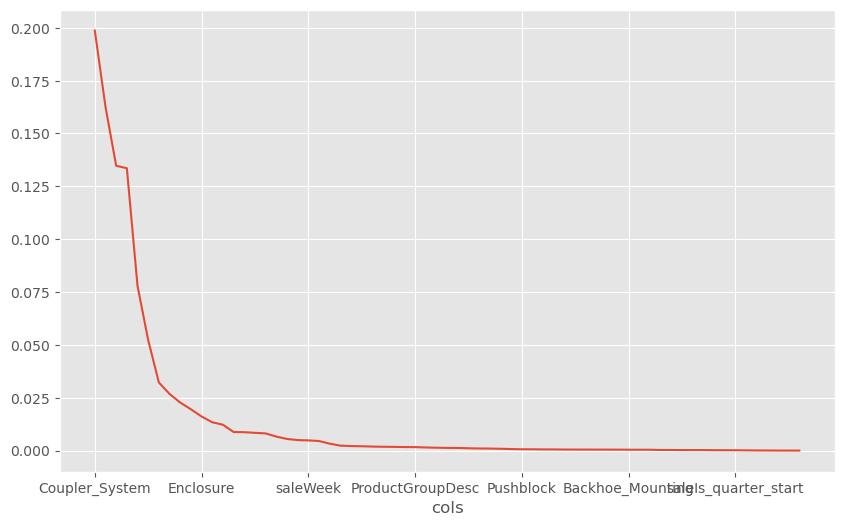

In [20]:
fi.plot('cols', 'imp', figsize=(10, 6), legend=False)

<Axes: ylabel='cols'>

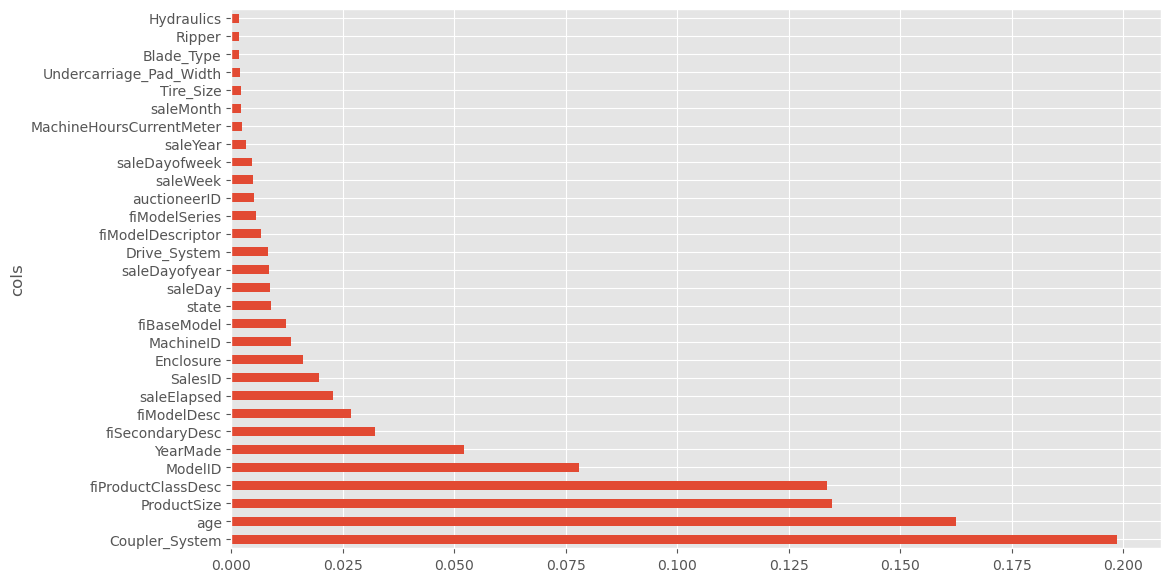

In [21]:
fi[:30].plot('cols', 'imp', 'barh', figsize=(12, 7), legend=False)

In [22]:
to_keep = fi[fi.imp > 0.002].cols
X_keep = df[to_keep]
len(to_keep)

26

## Remove Duplicates

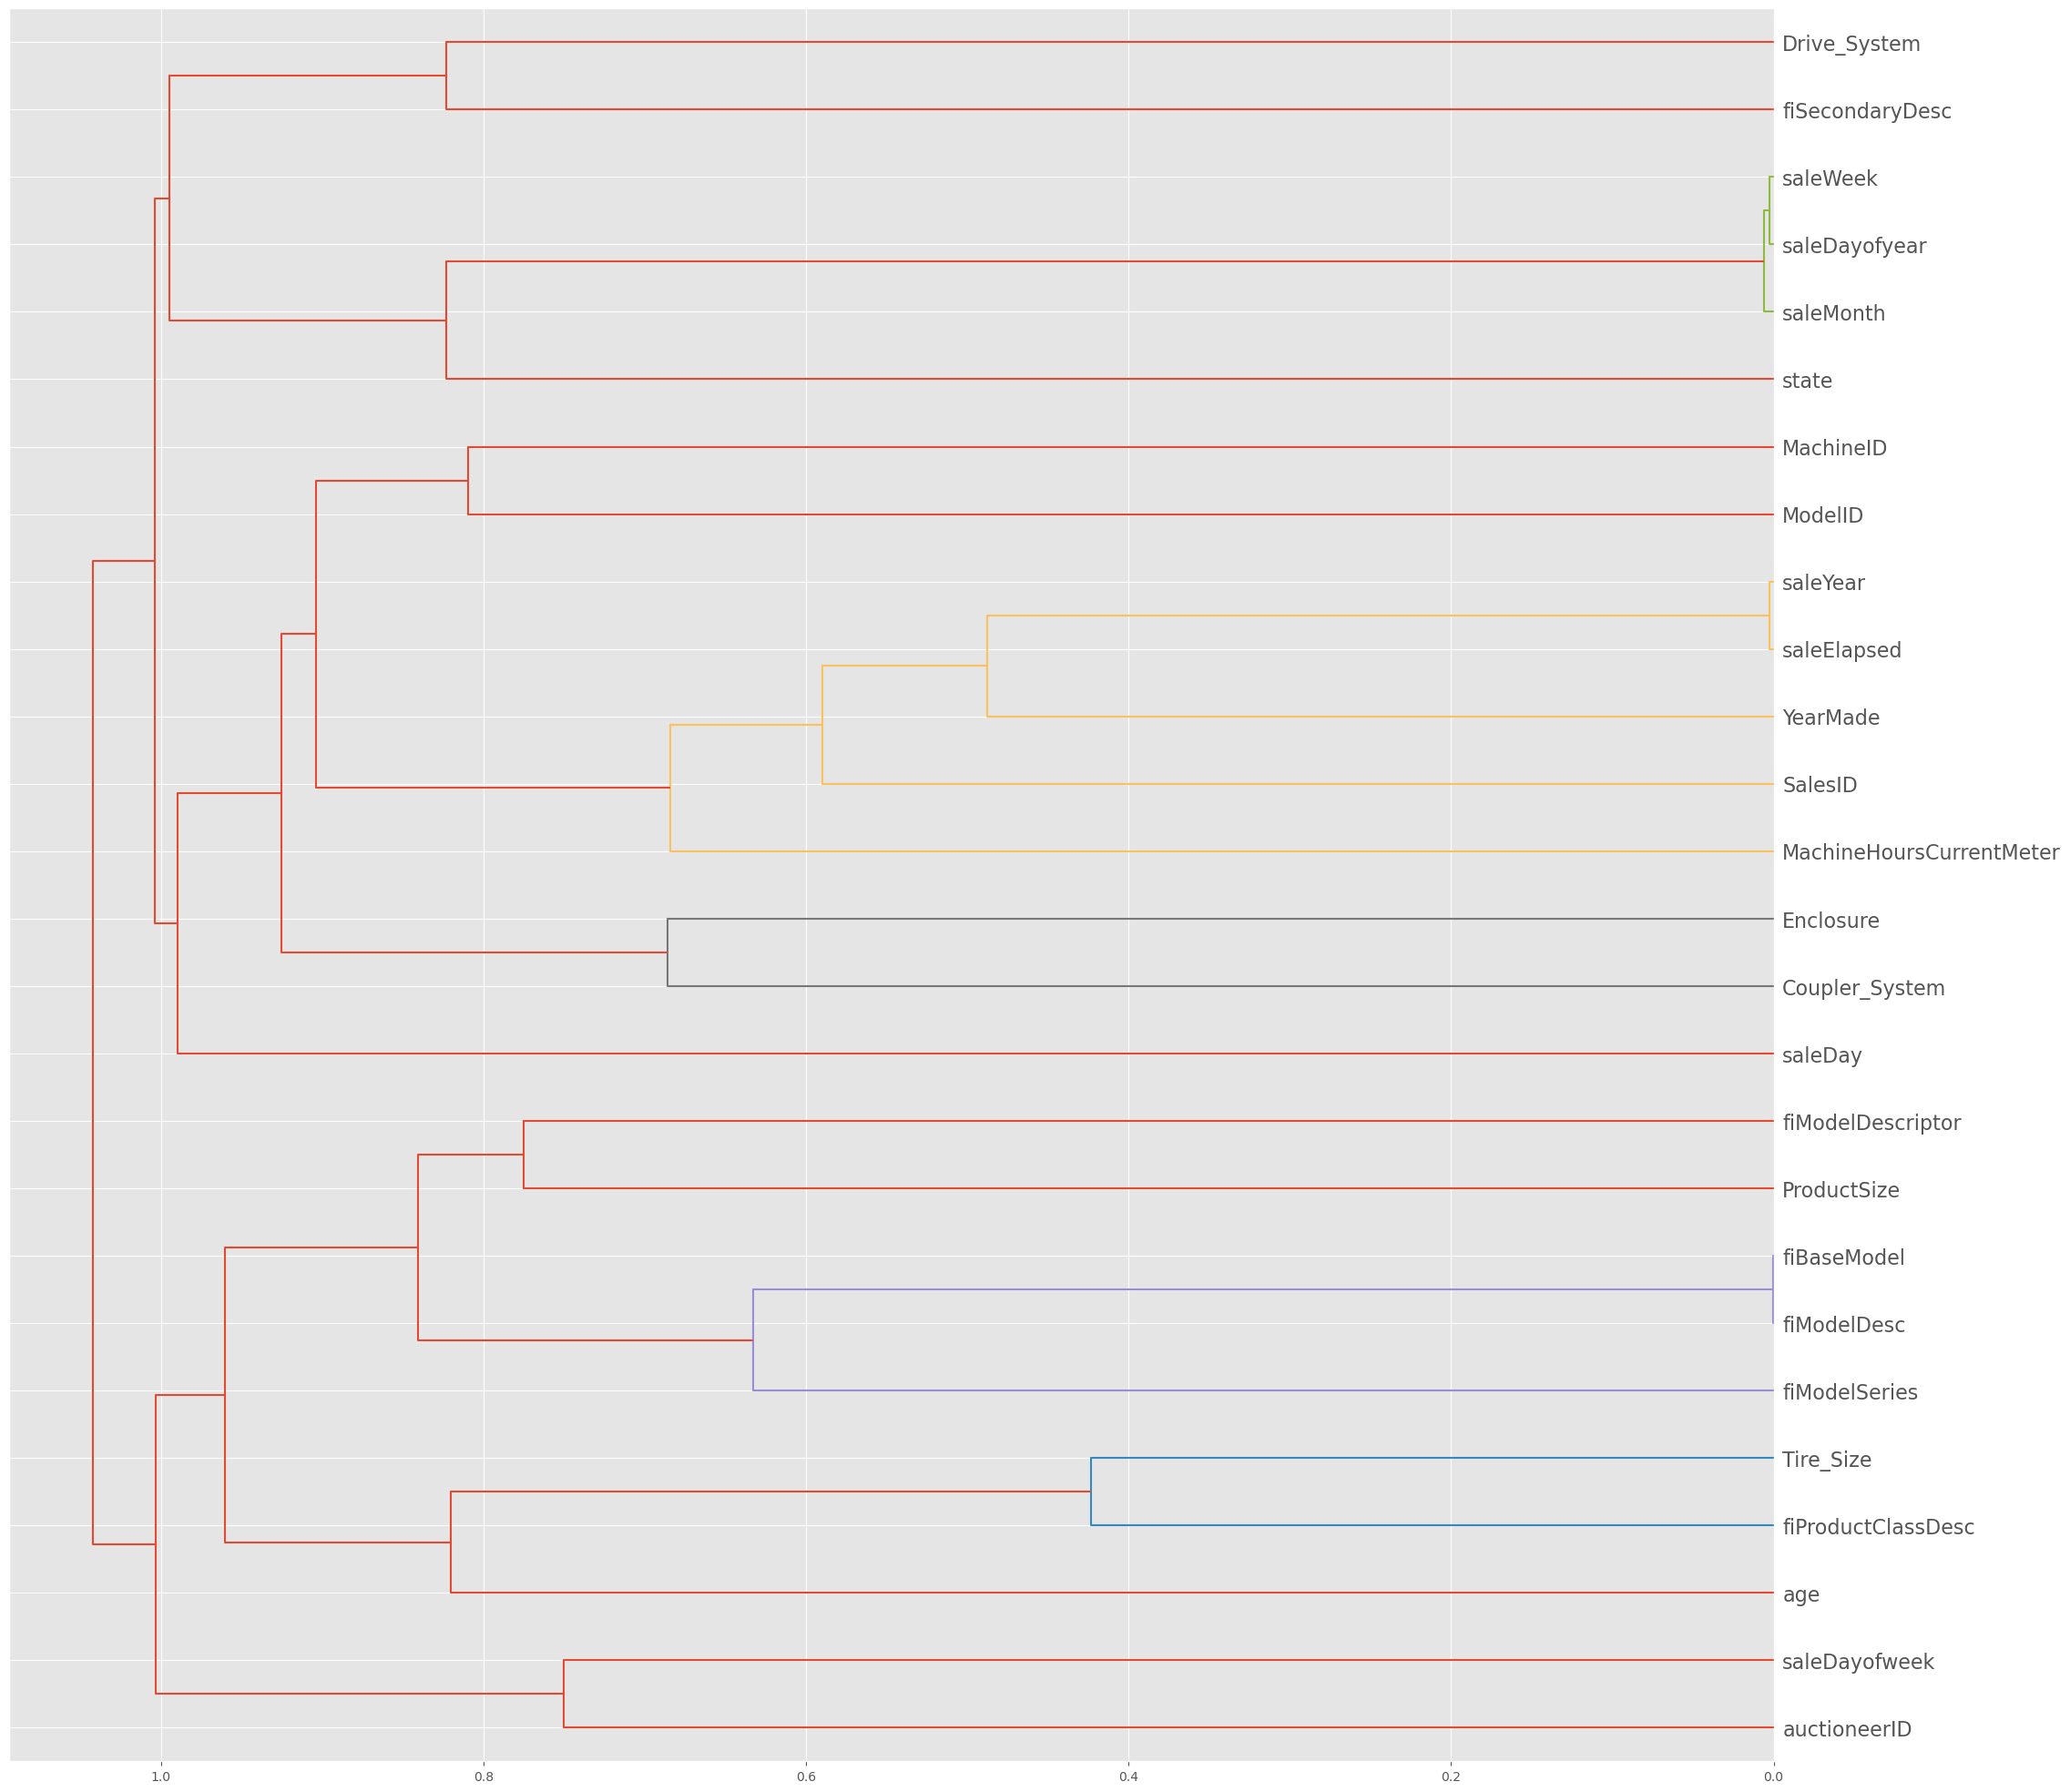

In [23]:
import scipy
from scipy.cluster import hierarchy as hc

corr = np.round(scipy.stats.spearmanr(X_keep).correlation, 4)
#corr = np.nan_to_num(corr)
corr_condensed = hc.distance.squareform(1-corr, checks=False)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(25,25))
dendrogram = hc.dendrogram(z, labels=X_keep.columns, orientation='left', leaf_font_size=16)
plt.show()

In [24]:
X_keep = X_keep.drop(["saleYear", "fiBaseModel", "saleWeek"], axis=1)

### Make model again

In [25]:
X_keep.shape

(401125, 23)

In [26]:
n_valid = 12000
n_trn = len(X_keep) - n_valid
X_train, X_valid = split_vals(X_keep, n_trn)
X_train.shape, X_valid.shape

((389125, 23), (12000, 23))

In [27]:
model = RandomForestRegressor(n_estimators=80, n_jobs=-1, min_samples_leaf=3, max_features=0.5, oob_score=True)

In [28]:
%time model.fit(X_train, y_train)

CPU times: total: 3min 37s
Wall time: 34.9 s


RandomForestRegressor(max_features=0.5, min_samples_leaf=3, n_estimators=80,
                      n_jobs=-1, oob_score=True)

In [29]:
print_score(model)

[0.12073198997941965,
 0.22579554432284102,
 0.9666822903879384,
 0.8917913434574107,
 0.9124802734139473]

### Calculate feature importance again

In [30]:
fi = rf_feat_importance(model, X_keep)
fi[:10]

,cols,imp
0,Coupler_System,0.149824
1,age,0.138667
2,ProductSize,0.135610
3,fiProductClassDesc,0.095364
5,YearMade,0.076668
4,ModelID,0.069658
10,Enclosure,0.057415
7,fiModelDesc,0.051168
6,fiSecondaryDesc,0.048843
16,fiModelDescriptor,0.031239


<Axes: ylabel='cols'>

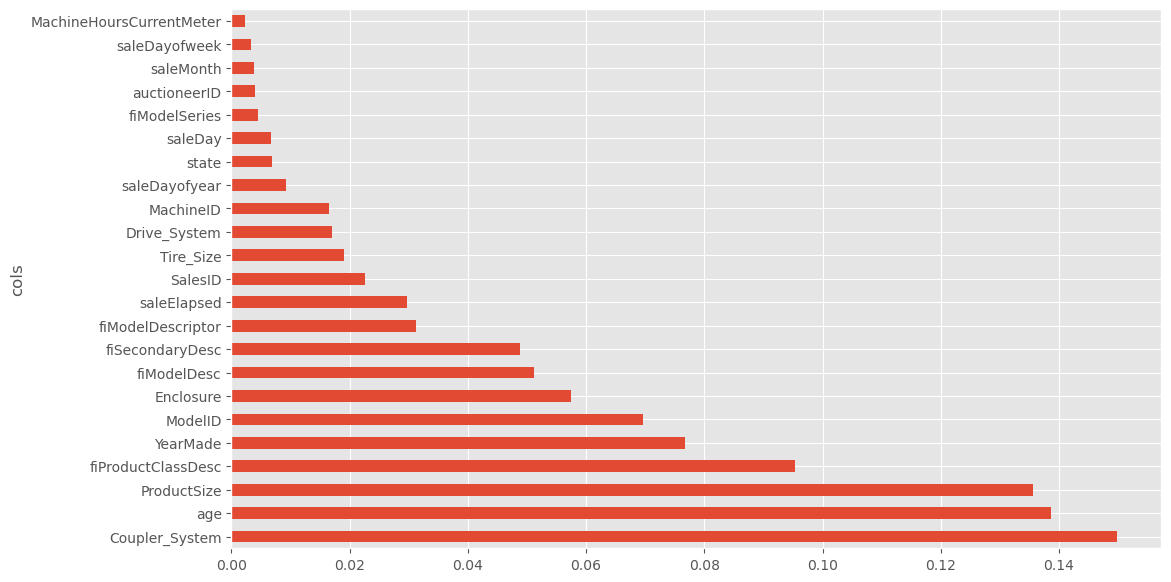

In [31]:
fi[:30].plot('cols', 'imp', 'barh', figsize=(12, 7), legend=False)

## Confidence based on tree variance

In [32]:
raw_data = pd.read_feather("tmp/raw")
raw_data.SalePrice = np.log(raw_data.SalePrice)
raw_data.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,Low,521D,521,D,None,None,None,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,None,EROPS w AC,None or Unspecified,None,None or Unspecified,None,None,None,None,None,None,None,2 Valve,None,None,None,None,None or Unspecified,None or Unspecified,None,None,None,None,None,None,None,None,None,None,None,None,Standard,Conventional,2006,11,46,16,3,320,False,False,False,False,False,False,1.163635e+09
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,Low,950FII,950,F,II,None,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,None,EROPS w AC,None or Unspecified,None,None or Unspecified,None,None,None,None,None,None,None,2 Valve,None,None,None,None,23.5,None or Unspecified,None,None,None,None,None,None,None,None,None,None,None,None,Standard,Conventional,2004,3,13,26,4,86,False,False,False,False,False,False,1.080259e+09
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,High,226,226,None,None,None,None,Skid Steer Loader - 1351.0 to 1601.0 Lb Operating Capacity,New York,SSL,Skid Steer Loaders,None,OROPS,None or Unspecified,None,None,None,None,None,None,None,None,None,Auxiliary,None,None,None,None,None,None or Unspecified,None or Unspecified,None or Unspecified,Standard,None,None,None,None,None,None,None,None,None,None,None,2004,2,9,26,3,57,False,False,False,False,False,False,1.077754e+09
3,1139251,10.558414,1026470,332,121,3.0,2001,3486.0,High,PC120-6E,PC120,None,-6E,None,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metric Tons",Texas,TEX,Track Excavators,None,EROPS w AC,None,None,None,None,None,None,None,None,None,None,2 Valve,None,None,None,None,None,None or Unspecified,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2011,5,20,19,3,139,False,False,False,False,False,False,1.305763e+09
4,1139253,9.305651,1057373,17311,121,3.0,2007,722.0,Medium,S175,S175,None,None,None,None,Skid Steer Loader - 1601.0 to 1751.0 Lb Operating Capacity,New York,SSL,Skid Steer Loaders,None,EROPS,None or Unspecified,None,None,None,None,None,None,None,None,None,Auxiliary,None,None,None,None,None,None or Unspecified,None or Unspecified,None or Unspecified,Standard,None,None,None,None,None,None,None,None,None,None,None,2009,7,30,23,3,204,False,False,False,False,False,False,1.248307e+09


In [33]:
n_valid = 12000
n_trn = len(raw_data) - n_valid
train, valid = split_vals(raw_data, n_trn)
train.shape, valid.shape

((389125, 65), (12000, 65))

### How confident are we in Enclosure_Erops w AC ?

In [34]:
raw_data.Enclosure.value_counts()

Enclosure
OROPS                  173932
EROPS                  139026
EROPS w AC              87820
EROPS AC                   17
NO ROPS                     3
None or Unspecified         2
Name: count, dtype: int64

In [35]:
preds = np.stack([tree.predict(X_valid) for tree in model.estimators_])

In [36]:
x = valid.copy()
x["pred"] = np.mean(preds, axis=0)
x["pred_std"] = np.std(preds, axis=0)

In [37]:
flds = ["Enclosure", "SalePrice", "pred", "pred_std"]
enc_summ = x[flds].groupby(flds[0], as_index=False).mean()

In [38]:
enc_summ

,Enclosure,SalePrice,pred,pred_std
0,EROPS,9.849178,9.837905,0.24443
1,EROPS w AC,10.623971,10.595080,0.23001
2,OROPS,9.682064,9.675591,0.20899


***We are confident of results comming from data points with an Enclosure of OROPS more the with Erops w AC/EROPS (Small standard deviation == Small Confidence Interval)***

<Axes: ylabel='Enclosure'>

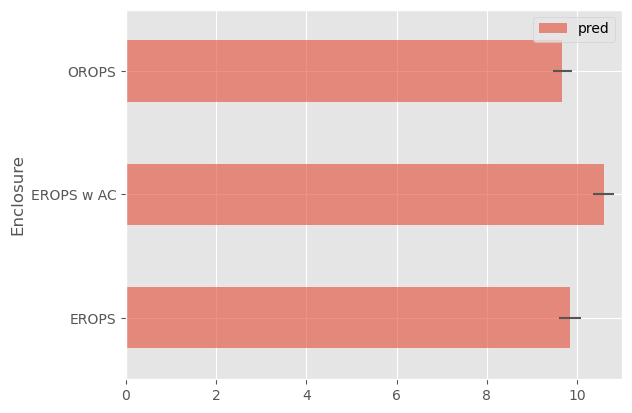

In [39]:
enc_summ.plot('Enclosure', 'pred', 'barh', xerr='pred_std', alpha=0.6, xlim=(0,11))

### How confident are we in Coupler System ?

In [40]:
flds = ["Coupler_System", "SalePrice", "pred", "pred_std"]
enc_summ = x[flds].groupby(flds[0], as_index=False).mean()

In [41]:
enc_summ

,Coupler_System,SalePrice,pred,pred_std
0,None or Unspecified,9.253847,9.257394,0.204079
1,Yes,9.327597,9.308803,0.205438


***We are confident of results comming from data points with an ProductGroupDesc of Skid Steer Loaders (Small standard deviation == Small Confidence Interval)***

<Axes: ylabel='Coupler_System'>

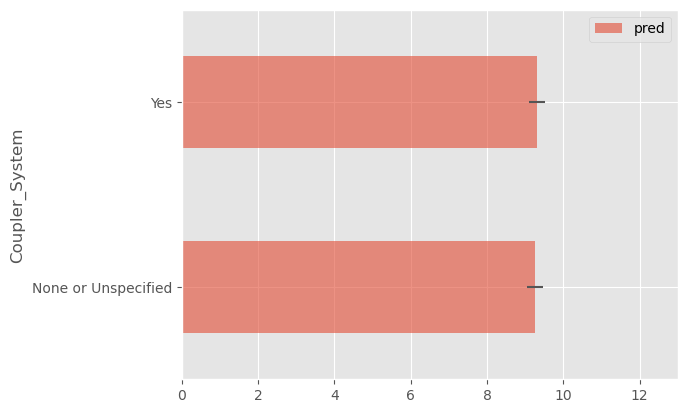

In [42]:
enc_summ.plot('Coupler_System', 'pred', 'barh', xerr='pred_std', alpha=0.6, xlim=(0,13))

### How confident are we in Product Size ?

In [43]:
flds = ["ProductSize", "SalePrice", "pred", "pred_std"]
enc_summ = x[flds].groupby(flds[0], as_index=False).mean()

In [44]:
enc_summ

,ProductSize,SalePrice,pred,pred_std
0,Compact,9.735093,9.789406,0.290074
1,Large,10.470589,10.419624,0.308373
2,Large / Medium,10.691871,10.668622,0.257268
3,Medium,10.681511,10.633773,0.242735
4,Mini,9.535147,9.549897,0.222566
5,Small,10.324448,10.330319,0.271806


***We may not be too confident of results comming from data points with an ProductSize of Large***

<Axes: ylabel='ProductSize'>

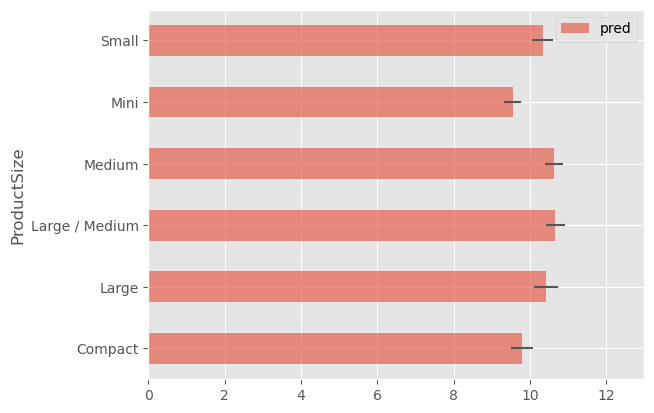

In [45]:
enc_summ.plot('ProductSize', 'pred', 'barh', xerr='pred_std', alpha=0.6, xlim=(0,13))

## Data Interpretation/Insights

### Partial Dependence

**Partial dependence:** *shows how a particular feature affects a prediction. By making all other features constant*

In [46]:
def get_sample(df,n, random_state=None):
    """ Gets a random sample of n rows from df, without replacement.
    """
    if random_state is not None:
        np.random.seed(random_state)
        
    idxs = sorted(np.random.permutation(len(df))[:n])
    return df.iloc[idxs].copy()

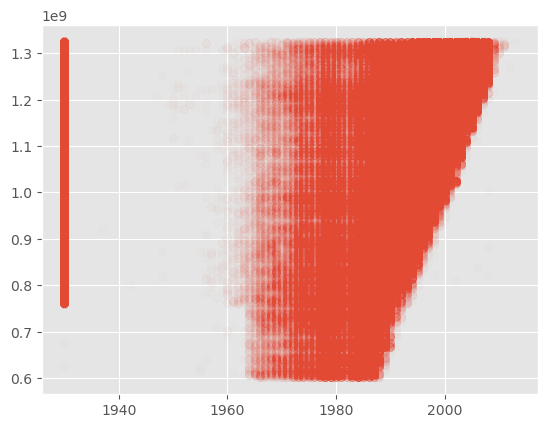

In [49]:
plt.scatter(df['YearMade'], df['saleElapsed'], alpha=0.01)

### Plot YearMade VS SalePrice

In [83]:
Sample = get_sample(df[df.YearMade > 1930], 500, 1)

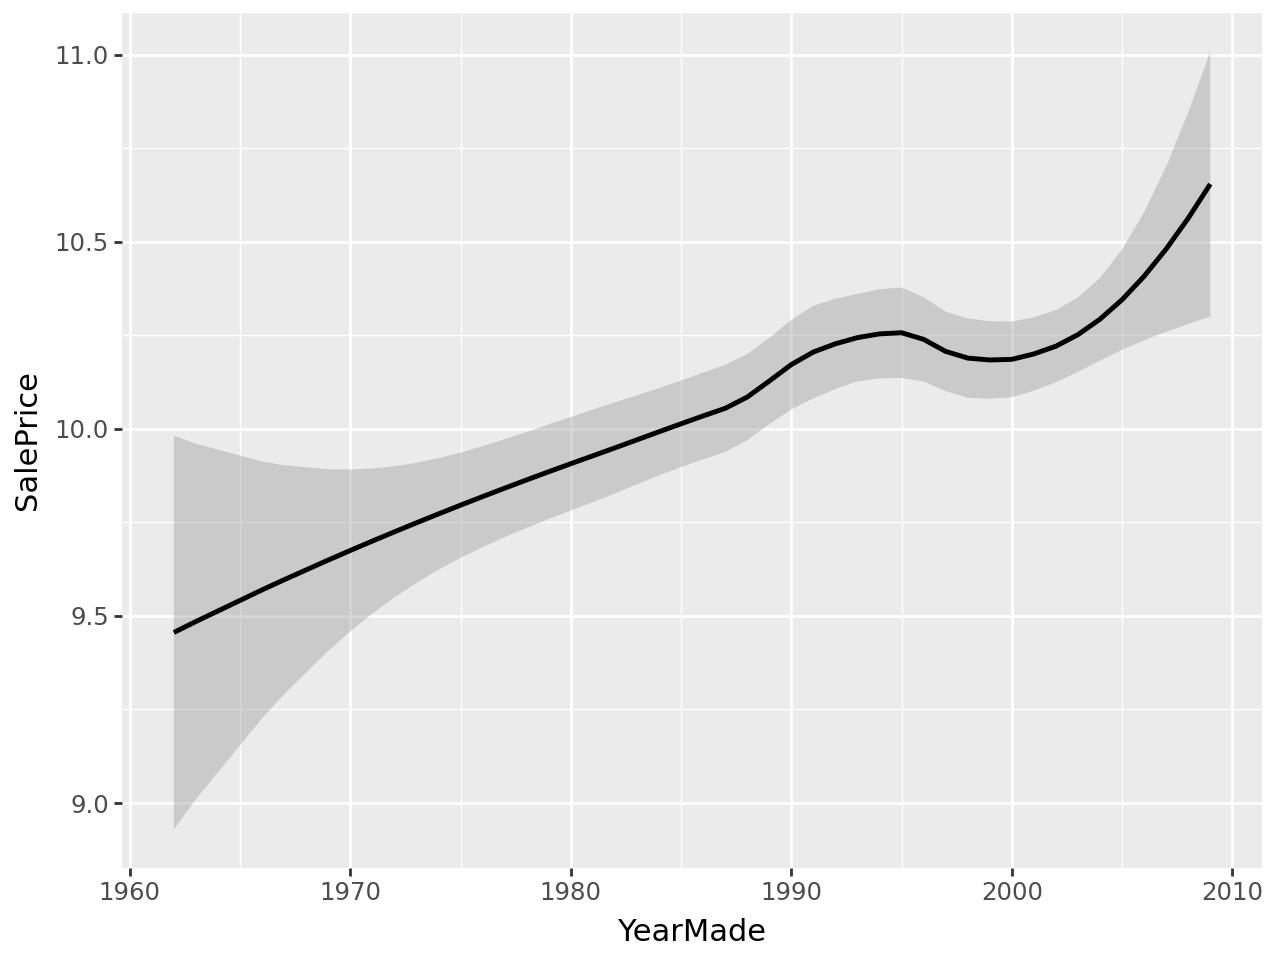

In [84]:
from plotnine import *
(
    ggplot(Sample, aes('YearMade', 'SalePrice'))+stat_smooth(se=True, method='loess')
)

*The plot shows that there was unusual a jump in sale price for products made between 1987 and 1995, then starting from 1995 to 2000 the sale prices' of products were decreasing*

**Try Another Sample**

In [91]:
Sample2 = get_sample(df[df.YearMade > 1945], 500, 1)

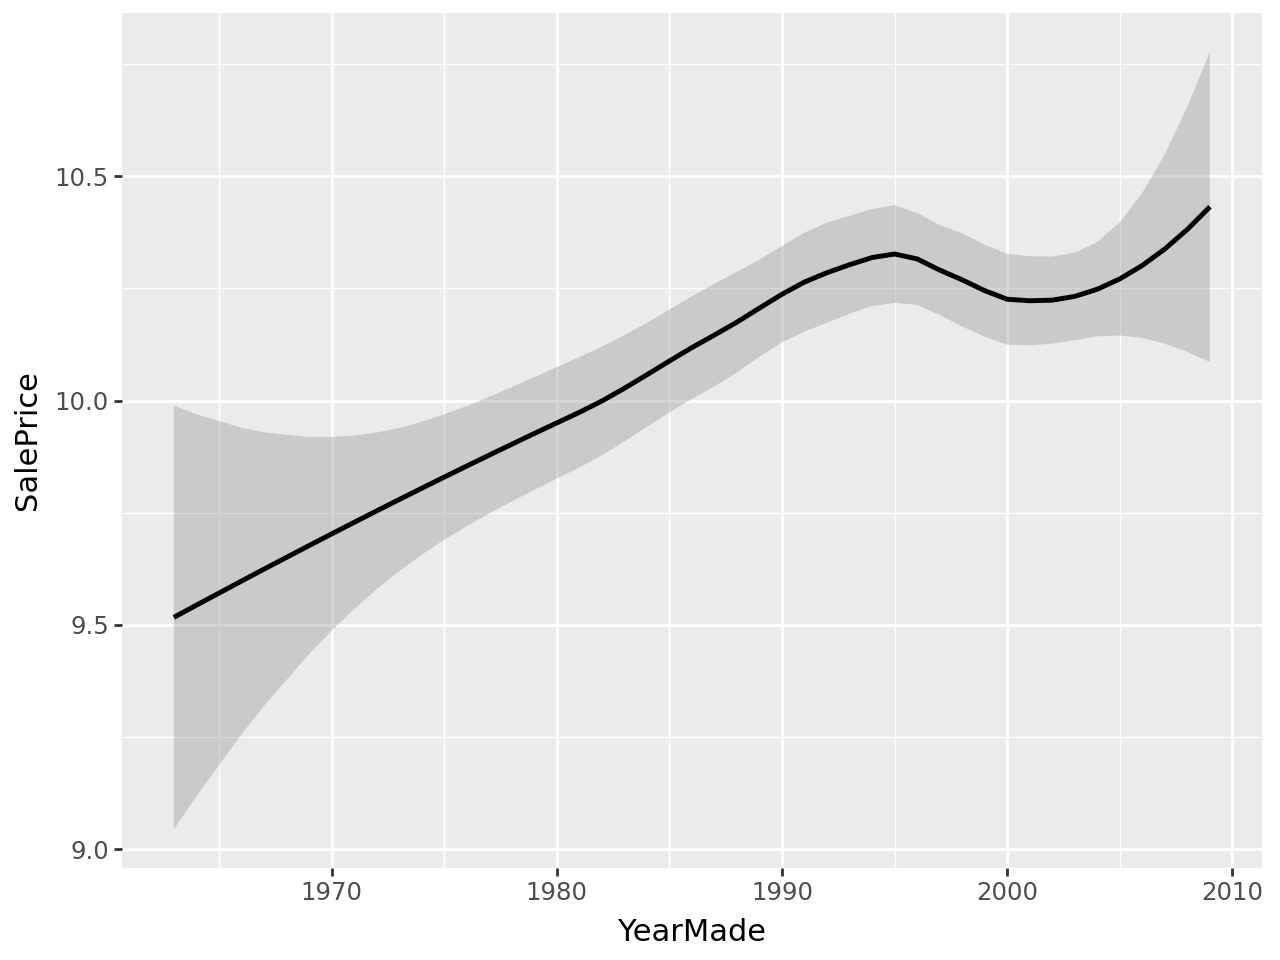

In [92]:
from plotnine import *
(
    ggplot(Sample2, aes('YearMade', 'SalePrice'))+stat_smooth(se=True, method='loess')
)

*The plot shows that there was unusual drop in sale price for products made between 1995 and 2000, then starting from 2000 the sale prices' of products started increasing slightly again*

**BUT...** it is not necessary that the relation between YearMade and SalePrice is what we see in the above plots.

**Because..** how would be the relation between two variables if everything else is eual ? ***(Recall the definition of Partial Dependence)***

**For a deeper look at PDP:** https://towardsdatascience.com/explain-machine-learning-models-partial-dependence-ce6b9923034f

### Partial Dependence Plot (PDP)

In [177]:
X_Sample = get_sample(X_train[X_train.YearMade > 1930], 500, random_state=1)

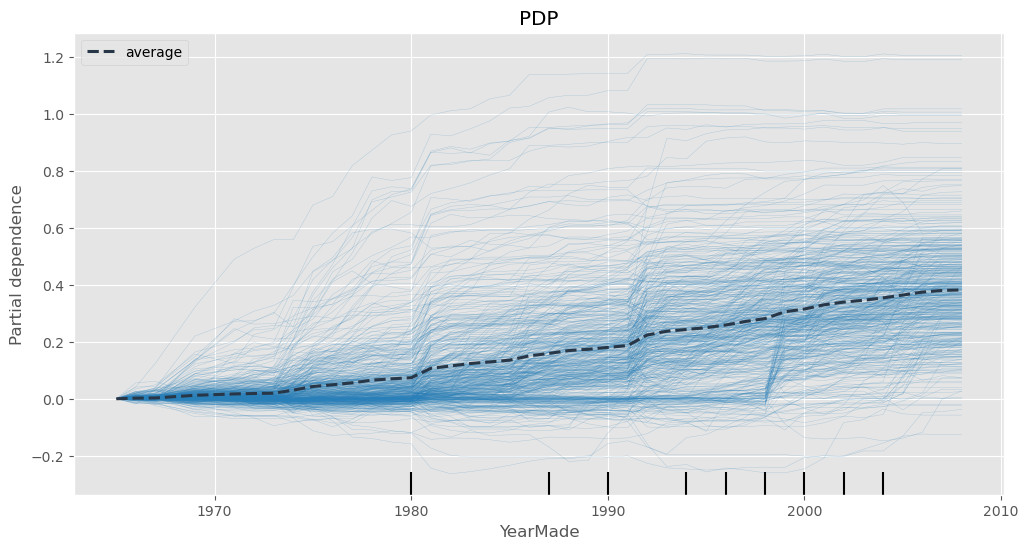

In [178]:
from sklearn.inspection import PartialDependenceDisplay

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("PDP")
pdp = PartialDependenceDisplay.from_estimator(model, X_Sample, ['YearMade'], kind='both', ax=ax, centered=True
                                              , line_kw={"color":"#283747", "linestyle": "--", "linewidth":2.2}
                                        , ice_lines_kw={"color":"#2980B9", "linestyle": "solid", "linewidth":0.3})

The PDP clarifies that between 1990 and 2000, **no unusual drops happened**.

### Interaction Plot

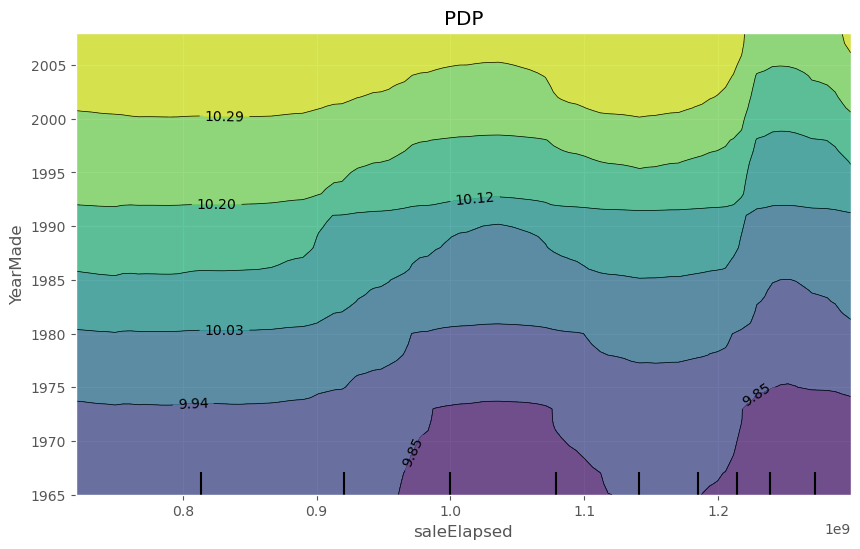

In [183]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("PDP")
pdp = PartialDependenceDisplay.from_estimator(model, X_Sample, [('saleElapsed', 'YearMade')]
                                              , ax=ax, centered=False)

**Interaction plot conclusions :**
* The products made in most recent years, have the highest sale prices.
* The products with most saleElapsed, have the the lowest sale prices.
* The impact of YearMade on SalePrice is bigger than the imapct of saleElapsed on SalePrice.

## Tree Interpreter